In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2000-01-01'
end = '2024-09-09'
stock = 'HDFCBANK.NS'
data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [5]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,16.600000,17.000000,16.600000,17.000000,13.939934,332590
2000-01-04,18.200001,18.344999,17.100000,17.379999,14.251536,1687100
2000-01-05,17.000000,17.389999,16.500000,16.695000,13.689838,1598200
2000-01-06,16.799999,17.000000,16.530001,16.830000,13.800537,850260
2000-01-07,16.215000,17.100000,16.215000,16.834999,13.804635,851440
...,...,...,...,...,...,...
2024-09-02,1646.800049,1646.800049,1623.199951,1626.949951,1626.949951,17024840
2024-09-03,1634.000000,1639.949951,1624.599976,1637.349976,1637.349976,18641430
2024-09-04,1639.000000,1644.800049,1632.000000,1641.800049,1641.800049,12341372


In [8]:
ma_100_days = data.Close.rolling(100).mean()

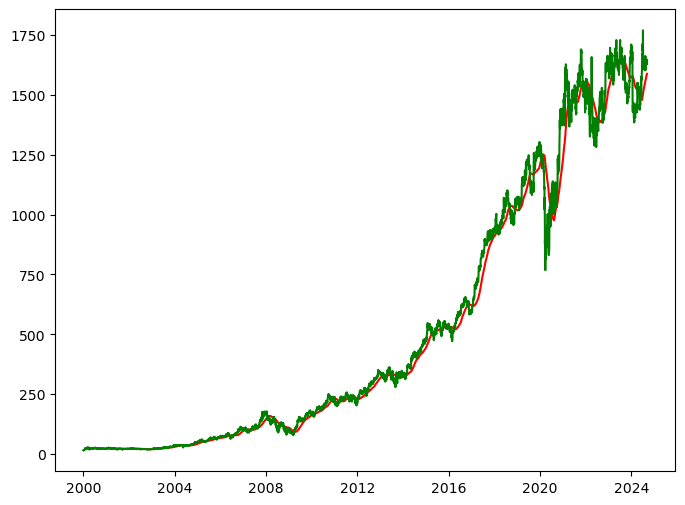

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [12]:
ma_200_days = data.Close.rolling(200).mean()

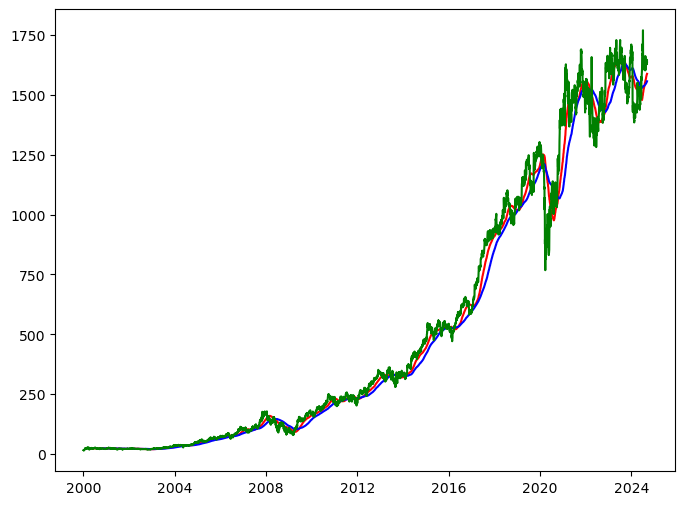

In [14]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [16]:
data.dropna(inplace = True )

In [18]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [20]:
data_train.shape[0]

4928

In [22]:
data_test.shape[0]

1233

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [25]:
data_train_scale = scaler.fit_transform(data_train)

In [28]:
x = []
y = []
for i in range(100 , data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [30]:
x,y = np.array(x), np.array(y)

In [32]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [33]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [34]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu' , return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM( units = 60 , activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu' , return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\Yashwardhan Shinde\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [37]:
model.fit(x,y, epochs = 50 , batch_size = 32, verbose = 1)

Epoch 1/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.1127
Epoch 2/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - loss: 0.0054
Epoch 3/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - loss: 0.0028
Epoch 4/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - loss: 0.0029
Epoch 5/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - loss: 0.0027
Epoch 6/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - loss: 0.0023
Epoch 7/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 0.0023
Epoch 8/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - loss: 0.0023
Epoch 9/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 0.0020
Epoch 10/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - loss: 0.0024
Epoch 11/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - loss: 0.0019
Epoch 12/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - loss: 0.0018
Epoch 13/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - loss: 0.0018
Epoch 14/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 0.0018
Epoch 15/50
151/151 ━━━━━━━━━

In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [60]:
past_100_days = data_train.tail(100)

In [62]:
data_test = pd.concat([past_100_days, data_test], ignore_index = True)

In [64]:
data_test_scale = scaler.fit_transform(data_test)

In [66]:
x = []
y = []
for i in range(100 , data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y = np.array(x),np.array(y)

In [68]:
y_predict = model.predict(x)

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [70]:
scale = 1/scaler.scale_

In [72]:
y_predict = y_predict*scale

In [74]:
y = y*scale

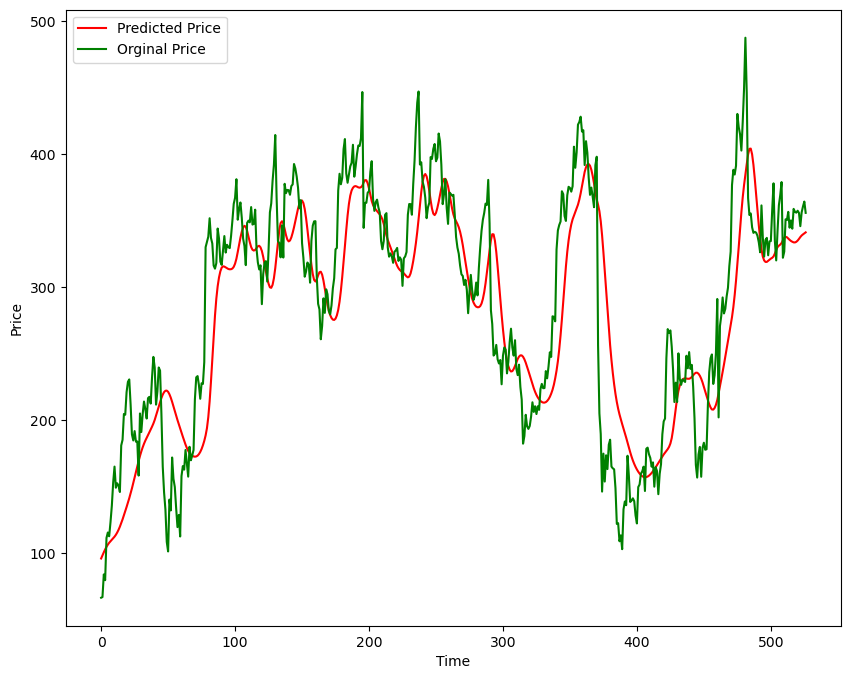

In [87]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Orginal Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [78]:
model.save('Stock Predictions Model1.keras')